# Project 1

### Name of facility: EnergiCorp
In a fictional nuclear energy factory named EnergiCorp, the need arises to analyze radiation exposure data for employees to ensure the continued safety and well-being of the workforce. The facility operates nuclear reactors and other radiation-emitting equipment to generate electricity, adhering to stringent safety protocols and regulatory requirements. As part of the radiation protection program, comprehensive data analysis is required to assess employee radiation exposure levels and identify potential areas of improvement in radiation safety measures.

### Problem statement: 
EnergiCorp faces challenges in effectively analyzing the radiation exposure data, leading to the following problem statement:

Problem: EnergiCorp lacks a streamlined and efficient process to analyze and interpret radiation exposure data for its employees, hindering the identification of patterns, trends, and potential areas of concern. 

The goal of this project is to do a day shift and night shift comparison by using machine learning to predict a certain amount of radiation a person will take over a given time frame.

The tasks we do within a radioactive environment use a unique number, the people doing this task will get an EPD (Electronic Personal Dosimeter) that they have to tell the Health Physics Monitor what task id they will go down on before the issue of the EPD this will track there dose and time within the radioactive environment.

What we know about the datasets: 

* Name is 'employee_' followed by a number
* You can have duplicates on all individual columns but not row by row duplicates 
* Time In and Time out columns should only include datetime64 data types
* No body dose should exeed 0.05 

# Importing my libraries

In [1]:
import pandas as pd 
import numpy as np
from datetime import datetime, date, time
import cufflinks as cf
cf.go_offline()
cf.set_config_file(offline=False, world_readable=True)
import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt

# Read the data

In [2]:
df1 = pd.read_csv('data1.csv')
df2 = pd.read_csv('data2.csv')

In [3]:
df1

,Name,Unnamed: 1,Time in,Unnamed: 3,Time/Date\nOut,Unnamed: 5,Whole Body Dose
0,employee_26,NaN,16/07/2032 22:50,NaN,17/07/2032 06:49,NaN,0.044
1,employee_14,NaN,16/07/2032 22:52,NaN,17/07/2032 06:50,NaN,0.038
2,employee_26,NaN,17/07/2032 22:46,NaN,18/07/2032 06:47,NaN,0.011
3,employee_9,NaN,21/07/2032 23:11,NaN,22/07/2032 06:45,NaN,0.015
4,employee_8,NaN,21/07/2032 23:12,NaN,22/07/2032 06:47,NaN,0.008
...,...,...,...,...,...,...,...
122,employee_8,NaN,17/09/2032 22:59,NaN,18/09/2032 06:48,NaN,0.011
123,employee_21,NaN,17/09/2032 23:00,NaN,18/09/2032 06:47,NaN,0.012
124,employee_17,NaN,01/09/2032 23:05,NaN,NaN,NaN,0.003
125,employee_15,NaN,NaN,NaN,16/09/2032 23:26,NaN,0.001


In [4]:
df2

,Name,Unnamed: 1,Time In,Time/Date Out,Unnamed: 4,Unnamed: 5,Whole Body Dose msv
0,employee_1,NaN,21/07/2025 09:57,21/07/2025 15:13,NaN,NaN,0.008
1,employee_1,NaN,22/07/2025 09:03,22/07/2025 15:10,NaN,NaN,0.009
2,employee_1,NaN,10/08/2025 09:17,10/08/2025 15:57,NaN,NaN,0.020
3,employee_1,NaN,11/08/2025 08:58,11/08/2025 15:57,NaN,NaN,0.012
4,employee_1,NaN,13/08/2025 09:04,13/08/2025 15:11,NaN,NaN,0.021
...,...,...,...,...,...,...,...
153,employee_B,NaN,03/08/2025 08:36,03/08/2025 15:02,NaN,NaN,0.042
154,employee_G,NaN,19/01/2026 21:42,20/01/2026 06:06,NaN,NaN,0.004
155,NaN,NaN,NaN,NaN,NaN,NaN,NaN
156,employee_6,NaN,17/12/2025 13:30,17/12/2025 14:55,NaN,NaN,0.004


# Data preprocessing

In [5]:
# Iterate over the columns of df1 and df2 together
for dt1, dt2 in zip(df1.columns, df2.columns):
    # Find empty values in df1 column
    empty_values1 = df1[dt1].isnull().sum()
    
    # Find empty values in df2 column
    empty_values2 = df2[dt2].isnull().sum()

    # Print the column name and the count of empty values for both dataframes
    print(f"Column in df1: {dt1} - Empty Values: {empty_values1}")
    print(f"Column in df2: {dt2} - Empty Values: {empty_values2}")

Column in df1: Name - Empty Values: 1
Column in df2: Name - Empty Values: 2
Column in df1: Unnamed: 1 - Empty Values: 127
Column in df2: Unnamed: 1 - Empty Values: 158
Column in df1: Time in - Empty Values: 1
Column in df2: Time In - Empty Values: 3
Column in df1: Unnamed: 3 - Empty Values: 127
Column in df2: Time/Date Out - Empty Values: 3
Column in df1: Time/Date
Out - Empty Values: 1
Column in df2: Unnamed: 4 - Empty Values: 158
Column in df1: Unnamed: 5 - Empty Values: 127
Column in df2: Unnamed: 5 - Empty Values: 158
Column in df1: Whole Body Dose - Empty Values: 0
Column in df2: Whole Body Dose msv - Empty Values: 2


## Remove all unwanted columns in data

In [6]:
# Removing empty columns in df1
df1 = df1.dropna(axis=1, how='all')

# Removing empty columns in df2
df2 = df2.dropna(axis=1, how='all')
df1

,Name,Time in,Time/Date\nOut,Whole Body Dose
0,employee_26,16/07/2032 22:50,17/07/2032 06:49,0.044
1,employee_14,16/07/2032 22:52,17/07/2032 06:50,0.038
2,employee_26,17/07/2032 22:46,18/07/2032 06:47,0.011
3,employee_9,21/07/2032 23:11,22/07/2032 06:45,0.015
4,employee_8,21/07/2032 23:12,22/07/2032 06:47,0.008
...,...,...,...,...
122,employee_8,17/09/2032 22:59,18/09/2032 06:48,0.011
123,employee_21,17/09/2032 23:00,18/09/2032 06:47,0.012
124,employee_17,01/09/2032 23:05,NaN,0.003
125,employee_15,NaN,16/09/2032 23:26,0.001


## Renaming colums to be the same as each data frame

In [7]:
# Optimized renaming of columns in df1
df1.rename(columns={'Time in': 'Time_in', 'Time/Date\nOut': 'Time_out', 'Whole Body Dose': 'Whole_Body_Dose'}, inplace=True)

# Optimized renaming of columns in df2
df2.rename(columns={'Time/Date Out': 'Time_out', 'Whole Body Dose msv': 'Whole_Body_Dose', 'Time In': 'Time_in'}, inplace=True)
df2

,Name,Time_in,Time_out,Whole_Body_Dose
0,employee_1,21/07/2025 09:57,21/07/2025 15:13,0.008
1,employee_1,22/07/2025 09:03,22/07/2025 15:10,0.009
2,employee_1,10/08/2025 09:17,10/08/2025 15:57,0.020
3,employee_1,11/08/2025 08:58,11/08/2025 15:57,0.012
4,employee_1,13/08/2025 09:04,13/08/2025 15:11,0.021
...,...,...,...,...
153,employee_B,03/08/2025 08:36,03/08/2025 15:02,0.042
154,employee_G,19/01/2026 21:42,20/01/2026 06:06,0.004
155,NaN,NaN,NaN,NaN
156,employee_6,17/12/2025 13:30,17/12/2025 14:55,0.004


## Remove rows with empty cells

In [8]:
# Removing rows with empty cells in df1
df1.dropna(inplace=True)

# Removing rows with empty cells in df2
df2.dropna(inplace=True)

In [9]:
# Iterate over the columns

for dt in df1.columns:
    # Find empty values in the column
    empty_values = df1[dt].isnull().sum()

    # Print the column name and the count of empty values
    print(f"Column: {dt} - Empty Values: {empty_values}")

print(' ')
for dt in df2.columns:
    # Find empty values in the column
    empty_values = df2[dt].isnull().sum()

    # Print the column name and the count of empty values
    print(f"Column: {dt} - Empty Values: {empty_values}")

Column: Name - Empty Values: 0
Column: Time_in - Empty Values: 0
Column: Time_out - Empty Values: 0
Column: Whole_Body_Dose - Empty Values: 0
 
Column: Name - Empty Values: 0
Column: Time_in - Empty Values: 0
Column: Time_out - Empty Values: 0
Column: Whole_Body_Dose - Empty Values: 0


## Check for wrong data

In [10]:
#check for wrong data types in column whole body dose

# Identify rows with strings in 'whole body dose' of df1
df1_strings = df1[pd.to_numeric(df1['Whole_Body_Dose'], errors='coerce').isna()]

#Identify rows with strings in 'whole body dose' of df2
df2_strings = df2[pd.to_numeric(df2['Whole_Body_Dose'], errors='coerce').isna()]

# Inspect the rows with strings in 'col1'
print("Rows with strings in df1:")
print(df1_strings)

print("\nRows with strings in df2:")
print(df2_strings)


Rows with strings in df1:
            Name           Time_in          Time_out Whole_Body_Dose
118  employee_10  16/09/2032 22:35  16/09/2032 23:26               O

Rows with strings in df2:
Empty DataFrame
Columns: [Name, Time_in, Time_out, Whole_Body_Dose]
Index: []


In [11]:
# Replace 'O' with '0' in Whole_Body_Dose of df1
df1['Whole_Body_Dose'] = df1['Whole_Body_Dose'].str.replace('O', '0')
df1['Whole_Body_Dose'] = df1['Whole_Body_Dose'].astype(float)
df1

,Name,Time_in,Time_out,Whole_Body_Dose
0,employee_26,16/07/2032 22:50,17/07/2032 06:49,0.044
1,employee_14,16/07/2032 22:52,17/07/2032 06:50,0.038
2,employee_26,17/07/2032 22:46,18/07/2032 06:47,0.011
3,employee_9,21/07/2032 23:11,22/07/2032 06:45,0.015
4,employee_8,21/07/2032 23:12,22/07/2032 06:47,0.008
...,...,...,...,...
119,employee_12,17/09/2032 22:34,18/09/2032 06:50,0.011
120,employee_10,17/09/2032 22:35,18/09/2032 06:47,0.008
121,employee_15,17/09/2032 22:35,18/09/2032 06:48,0.025
122,employee_8,17/09/2032 22:59,18/09/2032 06:48,0.011


In [12]:
#check for wrong data types in columns time in and time out

data_frames = [df1, df2]  # List of data frames

for i, df in enumerate(data_frames):

    # Identify rows with wrong data (strings)
    df_wrg = df[df['Time_in'].isna() | df['Time_out'].isna()]

    # Remove rows with wrong data
    df_clean = df.dropna(subset=['Time_in', 'Time_out'])

    # Reset the index of the cleaned data frame
    df_clean = df_clean.reset_index(drop=True)

    # Inspect the rows with wrong data
    print("Rows with wrong data in the current data frame:")
    print(df_wrg)
    print()

    # Update df1 or df2 with the cleaned data frame
    data_frames[i] = df_clean

# Updated df1 and df2 with cleaned data
df1 = data_frames[0]
df2 = data_frames[1]


Rows with wrong data in the current data frame:
Empty DataFrame
Columns: [Name, Time_in, Time_out, Whole_Body_Dose]
Index: []

Rows with wrong data in the current data frame:
Empty DataFrame
Columns: [Name, Time_in, Time_out, Whole_Body_Dose]
Index: []



In [13]:
for df in data_frames:
    df['Time_in'] = pd.to_datetime(df['Time_in'], format='%d/%m/%Y %H:%M')
    df['Time_out'] = pd.to_datetime(df['Time_out'], format='%d/%m/%Y %H:%M')
df2.head(50)

,Name,Time_in,Time_out,Whole_Body_Dose
0,employee_1,2025-07-21 09:57:00,2025-07-21 15:13:00,0.008
1,employee_1,2025-07-22 09:03:00,2025-07-22 15:10:00,0.009
2,employee_1,2025-08-10 09:17:00,2025-08-10 15:57:00,0.020
3,employee_1,2025-08-11 08:58:00,2025-08-11 15:57:00,0.012
4,employee_1,2025-08-13 09:04:00,2025-08-13 15:11:00,0.021
5,employee_1,2025-08-31 22:09:00,2025-08-31 22:11:00,0.000
6,employee_1,2025-08-31 22:11:00,2025-09-01 05:37:00,0.040
7,employee_1,2025-09-01 22:47:00,2025-09-02 05:55:00,0.032
8,employee_1,2025-09-02 22:15:00,2025-09-03 06:09:00,0.035
9,employee_1,2025-09-03 22:37:00,2025-09-04 05:51:00,0.031


In [14]:
df1.info()
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 124 entries, 0 to 123
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Name             124 non-null    object        
 1   Time_in          124 non-null    datetime64[ns]
 2   Time_out         124 non-null    datetime64[ns]
 3   Whole_Body_Dose  124 non-null    float64       
dtypes: datetime64[ns](2), float64(1), object(1)
memory usage: 4.0+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 154 entries, 0 to 153
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Name             154 non-null    object        
 1   Time_in          154 non-null    datetime64[ns]
 2   Time_out         154 non-null    datetime64[ns]
 3   Whole_Body_Dose  154 non-null    float64       
dtypes: datetime64[ns](2), float64(1), object(1)
memory usage: 4.9+ KB


In [15]:
#Check if body doses are bellow 0.05

for i, df in enumerate(data_frames):
    # Get values in 'Whole_Body_Dose' column that are over the threshold
    above_threshold = df[df['Whole_Body_Dose'] >= 0.05]['Whole_Body_Dose']
    
    # Print the values above the threshold
    print(f"Values in df{i+1} with Whole_Body_Dose above or equal to 0.05:")
    print(above_threshold)
    print()


Values in df1 with Whole_Body_Dose above or equal to 0.05:
Series([], Name: Whole_Body_Dose, dtype: float64)

Values in df2 with Whole_Body_Dose above or equal to 0.05:
Series([], Name: Whole_Body_Dose, dtype: float64)



In [16]:
#remove duplicates

for i, df in enumerate(data_frames):
    # Remove duplicate rows
    df_clean = df.drop_duplicates()
    
    # Reset the index of the cleaned data frame
    df_clean = df_clean.reset_index(drop=True)
    
    # Print the cleaned data frame
    print(f"Cleaned df{i+1} (removed duplicate rows):")
    print(df_clean)
    print()
    
    # Update df1 or df2 with the cleaned data frame
    data_frames[i] = df_clean

# Updated df1 and df2 with cleaned data (removed duplicates)
df1 = data_frames[0]
df2 = data_frames[1]


Cleaned df1 (removed duplicate rows):
            Name             Time_in            Time_out  Whole_Body_Dose
0    employee_26 2032-07-16 22:50:00 2032-07-17 06:49:00            0.044
1    employee_14 2032-07-16 22:52:00 2032-07-17 06:50:00            0.038
2    employee_26 2032-07-17 22:46:00 2032-07-18 06:47:00            0.011
3     employee_9 2032-07-21 23:11:00 2032-07-22 06:45:00            0.015
4     employee_8 2032-07-21 23:12:00 2032-07-22 06:47:00            0.008
..           ...                 ...                 ...              ...
119  employee_12 2032-09-17 22:34:00 2032-09-18 06:50:00            0.011
120  employee_10 2032-09-17 22:35:00 2032-09-18 06:47:00            0.008
121  employee_15 2032-09-17 22:35:00 2032-09-18 06:48:00            0.025
122   employee_8 2032-09-17 22:59:00 2032-09-18 06:48:00            0.011
123  employee_21 2032-09-17 23:00:00 2032-09-18 06:47:00            0.012

[124 rows x 4 columns]

Cleaned df2 (removed duplicate rows):
           

In [17]:
#check that names have the correct format

import re

def find_invalid_entries(names):
    pattern = r'^employee_\d+$'  # Regular expression pattern to match 'employee_' followed by a number

    invalid_entries = []
    for name in names:
        if not re.match(pattern, name):
            invalid_entries.append(name)

    return invalid_entries

data_frames = [df1, df2]

for df in data_frames:
    column_names = df['Name']
    invalid_entries = find_invalid_entries(column_names)
    if invalid_entries:
        print("Invalid entries found:")
        for entry in invalid_entries:
            print(entry)
        else:
            print("No invalid entries found.")


Invalid entries found:
employee_11a
No invalid entries found.
Invalid entries found:
employee_B
employee_G
No invalid entries found.


In [18]:
#Replace employee_26a and remove employee_B and employee_G
df1['Name'] = df1['Name'].replace('employee_11a', 'employee_1')

# Removing 'employee_B' and 'employee_G' from the 'Name' column
df2 = df2[~df2['Name'].isin(['employee_B', 'employee_G'])]


In [19]:
df1.info()
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 124 entries, 0 to 123
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Name             124 non-null    object        
 1   Time_in          124 non-null    datetime64[ns]
 2   Time_out         124 non-null    datetime64[ns]
 3   Whole_Body_Dose  124 non-null    float64       
dtypes: datetime64[ns](2), float64(1), object(1)
memory usage: 4.0+ KB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 147 entries, 0 to 146
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Name             147 non-null    object        
 1   Time_in          147 non-null    datetime64[ns]
 2   Time_out         147 non-null    datetime64[ns]
 3   Whole_Body_Dose  147 non-null    float64       
dtypes: datetime64[ns](2), float64(1), object(1)
memory usage: 5.7+ KB


# Analysis
## Setting the name column to index

In [20]:
df1.set_index('Name',inplace=True)
df2.set_index('Name',inplace=True)
df1

,Time_in,Time_out,Whole_Body_Dose
Name,,,
employee_26,2032-07-16 22:50:00,2032-07-17 06:49:00,0.044
employee_14,2032-07-16 22:52:00,2032-07-17 06:50:00,0.038
employee_26,2032-07-17 22:46:00,2032-07-18 06:47:00,0.011
employee_9,2032-07-21 23:11:00,2032-07-22 06:45:00,0.015
employee_8,2032-07-21 23:12:00,2032-07-22 06:47:00,0.008
...,...,...,...
employee_12,2032-09-17 22:34:00,2032-09-18 06:50:00,0.011
employee_10,2032-09-17 22:35:00,2032-09-18 06:47:00,0.008
employee_15,2032-09-17 22:35:00,2032-09-18 06:48:00,0.025


## Sorting the data to see who was doing the task the most

As we can see below on data frame df1, employee 11 has clocked in on the job 13 times.

We need to understand that out of the 23 people below not all the people are the main technicians for this task, some may be supervisors or lifting support staff. This will be the same for the other data frame also.

In [21]:
most_used_df1 =df1.index.value_counts() 
most_used_df1.head(50)

employee_11    13
employee_21    10
employee_16     8
employee_14     8
employee_9      7
employee_8      7
employee_2      7
employee_18     7
employee_26     6
employee_19     6
employee_10     5
employee_15     5
employee_3      5
employee_1      4
employee_24     4
employee_23     3
employee_13     3
employee_6      3
employee_22     2
employee_5      2
employee_17     2
employee_4      2
employee_20     2
employee_7      1
employee_25     1
employee_12     1
Name: Name, dtype: int64

As we can see below on data frame df2, employee 21 has clocked in on the job 23 times. This is concerning as the men should be rotated more often, but this is not always achievable with leave, sickness and production requirements.

In [22]:
most_used_df2 = df2.index.value_counts()
most_used_df2.head(50)

employee_21    23
employee_1     16
employee_6     13
employee_16    12
employee_3     12
employee_25    11
employee_18     8
employee_11     7
employee_23     6
employee_9      5
employee_24     5
employee_4      4
employee_8      3
employee_5      3
employee_22     3
employee_20     3
employee_2      3
employee_15     3
employee_7      2
employee_13     2
employee_14     1
employee_19     1
employee_17     1
Name: Name, dtype: int64

# Getting a total dose per person taking for the entire task

We can see below that employee 11 has received 254 µSv (microsieverts). The Sievert represents the equivalent biological effect of depositing a joule of gamma ray energy in a kilogram of human tissue. To put the dose received into perspective on a 5 hour plane journey you would receive 40 µSv. Average yearly dose received from natural background a human receives is 3650 µSv.

In [23]:
df1.groupby(df1.index).sum().sort_values(by='Whole_Body_Dose', ascending=False)

,Whole_Body_Dose
Name,
employee_11,0.254
employee_18,0.187
employee_9,0.174
employee_21,0.160
employee_14,0.149
employee_2,0.139
employee_26,0.133
employee_3,0.106
employee_16,0.099


As we can see employee 21 has received a total of 444 µSv (microsieverts). The least amount taking is from employee 17 who took 5 µSv, employee 17 clocked in on the job 1 time. This should never be the case where one person takes a quarter of the accrued dose, we have got better at dose management, but we need to train more staff to do different jobs as then we could rotate the people more often.

In [24]:
df2.groupby(df2.index).sum().sort_values(by='Whole_Body_Dose', ascending=False)

,Whole_Body_Dose
Name,
employee_21,0.444
employee_1,0.279
employee_16,0.234
employee_18,0.196
employee_3,0.182
employee_23,0.161
employee_25,0.108
employee_11,0.082
employee_15,0.058


# Getting the total time taking per entry 

In the datetime(dtype) you can subtract the time out with the time in to give you the total time difference, this is what i did below. This gave me the duration of how long the Person had an EPD out for. Typical working hours are 9 hours and 15 minutes. Looking below you can see employee 13 took a total of 11 µSv (microsieverts) with a total of 7 hours and 49 minutes, employee 2 took a total 4 µSv (microsieverts) with the total time of 7 hours and 52 minutes. Similar times, but such a big difference in the dose taken.

In [26]:
# Convert 'Time_in' and 'Time_out' columns to datetime
for df in data_frames:
    df['Time_in'] = pd.to_datetime(df['Time_in'])
    df['Time_out'] = pd.to_datetime(df['Time_out'])

In [27]:
df1['diff'] = df1['Time_out'] -df1['Time_in']
df2['diff'] = df2['Time_out'] - df2['Time_in']
df2.head(10)

,Time_in,Time_out,Whole_Body_Dose,diff
Name,,,,
employee_1,2025-07-21 09:57:00,2025-07-21 15:13:00,0.008,0 days 05:16:00
employee_1,2025-07-22 09:03:00,2025-07-22 15:10:00,0.009,0 days 06:07:00
employee_1,2025-08-10 09:17:00,2025-08-10 15:57:00,0.020,0 days 06:40:00
employee_1,2025-08-11 08:58:00,2025-08-11 15:57:00,0.012,0 days 06:59:00
employee_1,2025-08-13 09:04:00,2025-08-13 15:11:00,0.021,0 days 06:07:00
employee_1,2025-08-31 22:09:00,2025-08-31 22:11:00,0.000,0 days 00:02:00
employee_1,2025-08-31 22:11:00,2025-09-01 05:37:00,0.040,0 days 07:26:00
employee_1,2025-09-01 22:47:00,2025-09-02 05:55:00,0.032,0 days 07:08:00
employee_1,2025-09-02 22:15:00,2025-09-03 06:09:00,0.035,0 days 07:54:00


## Converting the datetime to decimal 

Below I used the following code to convert my total time on the job to decimal time, this is so i could plot the time on charts as i could not get datetime(dtypes) to plot.

In [28]:
df1['Time_Decimal'] = (df1['diff']  / np.timedelta64(1, 'h'))
df2['Time_Decimal'] = (df2['diff']  / np.timedelta64(1, 'h'))

## Seperating the data frame into a dayshift and nightshift data frame

The below code will look for any time starting past 21:00 and class it as night shift. I separated my night shift and day shift for each data frame.

In [29]:
nightshift_3 = df1.loc[df1['Time_in'].dt.time > time(21,00)]
nightshift_3.head()

,Time_in,Time_out,Whole_Body_Dose,diff,Time_Decimal
Name,,,,,
employee_26,2032-07-16 22:50:00,2032-07-17 06:49:00,0.044,0 days 07:59:00,7.983333
employee_14,2032-07-16 22:52:00,2032-07-17 06:50:00,0.038,0 days 07:58:00,7.966667
employee_26,2032-07-17 22:46:00,2032-07-18 06:47:00,0.011,0 days 08:01:00,8.016667
employee_9,2032-07-21 23:11:00,2032-07-22 06:45:00,0.015,0 days 07:34:00,7.566667
employee_8,2032-07-21 23:12:00,2032-07-22 06:47:00,0.008,0 days 07:35:00,7.583333


In [30]:
nightshift_4 = df2.loc[df2['Time_in'].dt.time > time(21,00)]
nightshift_4.head(10)

,Time_in,Time_out,Whole_Body_Dose,diff,Time_Decimal
Name,,,,,
employee_1,2025-08-31 22:09:00,2025-08-31 22:11:00,0.000,0 days 00:02:00,0.033333
employee_1,2025-08-31 22:11:00,2025-09-01 05:37:00,0.040,0 days 07:26:00,7.433333
employee_1,2025-09-01 22:47:00,2025-09-02 05:55:00,0.032,0 days 07:08:00,7.133333
employee_1,2025-09-02 22:15:00,2025-09-03 06:09:00,0.035,0 days 07:54:00,7.900000
employee_1,2025-09-03 22:37:00,2025-09-04 05:51:00,0.031,0 days 07:14:00,7.233333
employee_1,2025-11-18 21:52:00,2025-11-19 05:43:00,0.019,0 days 07:51:00,7.850000
employee_11,2025-11-01 21:45:00,2025-11-02 07:31:00,0.009,0 days 09:46:00,9.766667
employee_11,2025-11-23 22:01:00,2025-11-24 05:12:00,0.019,0 days 07:11:00,7.183333
employee_11,2025-11-25 21:52:00,2025-11-26 05:26:00,0.021,0 days 07:34:00,7.566667


The below code will look at the Time in column to see if any, time starts before 21:00 and put it into a day shift data frame. This is the good thing about having an datetime(dtype) as this code was simple to do.

In [31]:
dayshift_3 = df1.loc[df1['Time_in'].dt.time < time(21,00)]
dayshift_3

,Time_in,Time_out,Whole_Body_Dose,diff,Time_Decimal
Name,,,,,
employee_2,2032-07-23 09:02:00,2032-07-23 15:07:00,0.030,0 days 06:05:00,6.083333
employee_11,2032-07-23 09:03:00,2032-07-23 15:07:00,0.029,0 days 06:04:00,6.066667
employee_25,2032-07-23 09:53:00,2032-07-23 15:07:00,0.011,0 days 05:14:00,5.233333
employee_2,2032-07-24 08:59:00,2032-07-24 17:02:00,0.043,0 days 08:03:00,8.050000
employee_11,2032-07-24 08:59:00,2032-07-24 17:02:00,0.039,0 days 08:03:00,8.050000
employee_2,2032-07-25 09:14:00,2032-07-25 16:03:00,0.013,0 days 06:49:00,6.816667
employee_11,2032-07-25 09:15:00,2032-07-25 16:02:00,0.012,0 days 06:47:00,6.783333
employee_2,2032-07-26 09:16:00,2032-07-26 15:12:00,0.007,0 days 05:56:00,5.933333
employee_24,2032-07-26 09:17:00,2032-07-26 10:54:00,0.016,0 days 01:37:00,1.616667


In [32]:
dayshift_4 = df2.loc[df2['Time_in'].dt.time < time(21,00)]
dayshift_4

,Time_in,Time_out,Whole_Body_Dose,diff,Time_Decimal
Name,,,,,
employee_1,2025-07-21 09:57:00,2025-07-21 15:13:00,0.008,0 days 05:16:00,5.266667
employee_1,2025-07-22 09:03:00,2025-07-22 15:10:00,0.009,0 days 06:07:00,6.116667
employee_1,2025-08-10 09:17:00,2025-08-10 15:57:00,0.020,0 days 06:40:00,6.666667
employee_1,2025-08-11 08:58:00,2025-08-11 15:57:00,0.012,0 days 06:59:00,6.983333
employee_1,2025-08-13 09:04:00,2025-08-13 15:11:00,0.021,0 days 06:07:00,6.116667
...,...,...,...,...,...
employee_6,2025-10-05 08:34:00,2025-10-05 09:14:00,0.002,0 days 00:40:00,0.666667
employee_6,2025-11-03 08:48:00,2025-11-03 14:48:00,0.008,0 days 06:00:00,6.000000
employee_6,2025-12-17 13:30:00,2025-12-17 14:55:00,0.004,0 days 01:25:00,1.416667


# df1, Time and Dose Data Total

In the below code I have summed up the total time taking across the entirety of the data frame, collective dose taking across the whole data frame, the average time and the average dose taking.

The task took a total of 33 days and 11 hours, accruing a total of 2.05 mSv (millisievert). 1 mSv (millisievert) is 1000 µSv (microsieverts).

In [33]:
df1['diff'].sum()

Timedelta('33 days 11:06:00')

In [35]:
df1['Whole_Body_Dose'].sum()

2.0500000000000003

In [36]:
df1['diff'].mean(axis=0)

Timedelta('0 days 06:28:35.806451612')

In [37]:
df1['Whole_Body_Dose'].mean(axis=0)

0.016532258064516116

## df1, Time and Dose Data Dayshift

As we can see day shift has taken a total of 12 days and 5 hours, with the total accrued dose of 1.04 mSv (millisievert) at an average dose of 18 µSv (microsieverts), this is interesting as the above collective average dose was 16 µSv (microsieverts).

In [38]:
dayshift_3['diff'].sum()

Timedelta('12 days 05:30:00')

In [40]:
dayshift_3['Whole_Body_Dose'].sum()

1.0490000000000002

In [41]:
dayshift_3['diff'].mean(axis=0)

Timedelta('0 days 05:08:56.842105263')

In [42]:
dayshift_3['Whole_Body_Dose'].mean(axis=0)

0.018403508771929835

## df1, Time and Dose Data Nightshift

Now the interesting stuff. The below code shows that the total time taken to complete the task was 21 days and 5 hours, accruing a total of 1.001 mSv (millisievert) with an average dose of 14 µSv (microsieverts).

So night shift took a total of 48 µSv (microsieverts) less than day shift, but took 9 days more to achieve this????

My discovery is that radiation is nocturnal or the employees on night shift are not handing in there EPDs (Electronic Personal Dosimeter) when the task is complete. You can make your own conclusion on this. I would say the latter as the men the feel they are being tracked, this is why they dont hand in the EPD when they complete the task.

In [44]:
nightshift_3['diff'].sum()

Timedelta('21 days 05:36:00')

In [45]:
nightshift_3['Whole_Body_Dose'].sum()

1.0010000000000001

In [46]:
nightshift_3['diff'].mean(axis=0)

Timedelta('0 days 07:36:21.492537313')

In [47]:
nightshift_3['Whole_Body_Dose'].mean(axis=0)

0.014940298507462695

# Pie Charts Showing df1 Total Dose, Dayshift Dose and Nightshift Dose 

The below code shows my interactive pie charts, you just hover the mouse over the top of the pie to see the dose accrued and the person thats taken it. You can see below that Person 15 took most of his dose on day shift.

In [50]:
df1.reset_index().iplot(kind="pie",
                             labels='Name',
                             values= 'Whole_Body_Dose',
                             textinfo='label',
                             pull=[0, 0, 0.1],
                        title="Total Body Dose Taken Per Person")
                             

dayshift_3.reset_index().iplot(kind="pie",
                             labels='Name',
                             values= 'Whole_Body_Dose',
                             textinfo='label',
                             pull=[0, 0, 0.1],
                               title="Total Body Dose Taken Per Person Dayshift")
                             

nightshift_3.reset_index().iplot(kind="pie",
                             labels='Name',
                             values= 'Whole_Body_Dose',
                             textinfo='label',
                             pull=[0, 0, 0.1],
                                 title="Total Body Dose Taken Per Person Nightshift")
                             

In the below code I have summed up the total time taking across the entirety of the data frame, collective dose taking across the whole data frame, the average time and the average dose taking.

The task took a total of 33 days and 20 hours, accruing a total of 2.10 mSv (millisievert). 1 mSv (millisievert) is 1000 µSv (microsieverts).

# df2, Time and Dose Data Total

In [51]:
df2['diff'].sum()

Timedelta('33 days 20:51:00')

In [52]:
df2['Whole_Body_Dose'].sum()

2.104

In [53]:
df2['diff'].mean(axis=0)

Timedelta('0 days 05:31:46.530612244')

In [54]:
df2['Whole_Body_Dose'].mean(axis=0)

0.014312925170068007

## df2, Time and Dose Data Dayshift

As we can see day shift has taken a total of 17 days and 8 hours, with the total accrued dose of 1.29 mSv (millisievert) at an average dose of 14 µSv (microsieverts). There was a total of **91** entries to dayshift.

In [55]:
dayshift_4['diff'].sum()

Timedelta('17 days 08:04:00')

In [56]:
dayshift_4['Whole_Body_Dose'].sum()

1.2870000000000001

In [57]:
dayshift_4['diff'].mean(axis=0)

Timedelta('0 days 04:37:22.666666666')

In [58]:
dayshift_4['Whole_Body_Dose'].mean(axis=0)

0.014299999999999986

## df2, Time and Dose Data Nightshift

As we can see night shift has taken a total of 16 days and 13 hours, with the total accrued dose of 0.817 mSv (millisievert) at an average dose of 14 µSv (microsieverts). There was a total of **58** entries to  night shift. Night shift is never guaranteed where i work and as you can see the difference of the **58** entries to night shift compared to the **91** entries on the day shift.

If you look at the mean of all the [diff] on night shift you will see it is always higher than the total diff and day shift. 

In [59]:
nightshift_4['diff'].sum()

Timedelta('16 days 12:47:00')

In [61]:
nightshift_4['Whole_Body_Dose'].sum()

0.8170000000000001

In [62]:
nightshift_4['diff'].mean(axis=0)

Timedelta('0 days 06:57:40')

In [64]:
nightshift_4['Whole_Body_Dose'].mean(axis=0)

0.014333333333333342

In [83]:
df2.reset_index().iplot(kind="pie",
                             labels='Name',
                             values= 'Whole_Body_Dose',
                             textinfo='label',
                             pull=[0, 0, 0.1],
                        title="Total Body Dose Taken Per Person")
                             

dayshift_4.reset_index().iplot(kind="pie",
                             labels='Name',
                             values= 'Whole_Body_Dose',
                             textinfo='label',
                             pull=[0, 0, 0.1],
                               title="Total Body Dose Taken Per Person Dayshift")
                             

nightshift_4.reset_index().iplot(kind="pie",
                             labels='Name',
                             values= 'Whole_Body_Dose',
                             textinfo='label',
                             pull=[0, 0, 0.1],
                                 title="Total Body Dose Taken Per Person Nightshift")

# Getting the total Dose and Time per person on both Data Frames

The below code shows the total time and the accrued dose taken, as you can see on this boat the dose is spread out better than the other boat, this is because we were told to rotate the people so that not one individual takes the most dose.

In [67]:
df = df1.groupby(df1.index).sum().sort_values(by='Time_Decimal', ascending=False)
df = df.reset_index()
df.head(10)

,Name,Whole_Body_Dose,Time_Decimal
0,employee_11,0.254,84.833333
1,employee_14,0.149,61.700000
2,employee_16,0.099,61.633333
3,employee_21,0.160,61.450000
4,employee_18,0.187,54.300000
5,employee_8,0.091,54.100000
6,employee_9,0.174,53.783333
7,employee_26,0.133,47.533333
8,employee_2,0.139,46.533333
9,employee_10,0.036,31.716667


In [68]:
fig1 = px.bar(df, x='Name', y='Time_Decimal', color='Whole_Body_Dose',text_auto=True, title='Total Dose and Time df1')
fig1.show()

It seems on this boat that employee 21 has taken nearly quarter of the total dose taking through out the entire task, this has to be managed better and as you see above it has been.

In [69]:
df1 = df2.groupby(df2.index).sum().sort_values(by='Time_Decimal', ascending=False)
df1 = df1.reset_index()
df1.head(10)

,Name,Whole_Body_Dose,Time_Decimal
0,employee_21,0.444,124.433333
1,employee_1,0.279,95.583333
2,employee_16,0.234,89.800000
3,employee_25,0.108,64.616667
4,employee_3,0.182,58.933333
5,employee_6,0.049,41.783333
6,employee_11,0.082,41.433333
7,employee_18,0.196,39.283333
8,employee_23,0.161,36.666667
9,employee_24,0.039,34.416667


In [70]:
fig2 = px.bar(df1, x='Name', y='Time_Decimal', color='Whole_Body_Dose',text_auto=True, title='Total Dose and Time df2')
fig2.show()

# An interactive scatter plot and bar chart

The graphs below show the difference in all individuals on the specific task on each boat, I used a scatter plot and an interactive bar chart to show my findings.

In [72]:
fig = px.scatter(df1, x='Whole_Body_Dose', y='Time_Decimal', text='Name', log_x=True, size_max=60)

fig.update_traces(textposition='top center')

fig.update_layout(
    height=800,
    title_text='Person and Dose df2')

fig.show()

fig1 = px.scatter(df, x='Whole_Body_Dose', y='Time_Decimal', text='Name', log_x=True, size_max=60)

fig1.update_traces(textposition='top center')

fig1.update_layout(
    height=800,
    title_text='Employee and Dose df1')

fig1.show()

In [73]:
fig6 = px.bar(df1, x='Name', y='Whole_Body_Dose', color='Time_Decimal',
  animation_frame='Name', animation_group='Time_Decimal', range_y=[0,0.500], range_x=[0,25])
fig6.layout.updatemenus[0].buttons[0].args[1]['frame']['duration'] = 3500


fig6.show()

fig7 = px.bar(df, x='Name', y='Whole_Body_Dose', color='Time_Decimal',
  animation_frame='Name', animation_group='Time_Decimal', range_y=[0,0.500], range_x=[0,26])
fig7.layout.updatemenus[0].buttons[0].args[1]['frame']['duration'] = 3500


fig7.show()

# My linear regression prediction model

dayshift_3 was my only successful prediction model of a 63% score prediction.

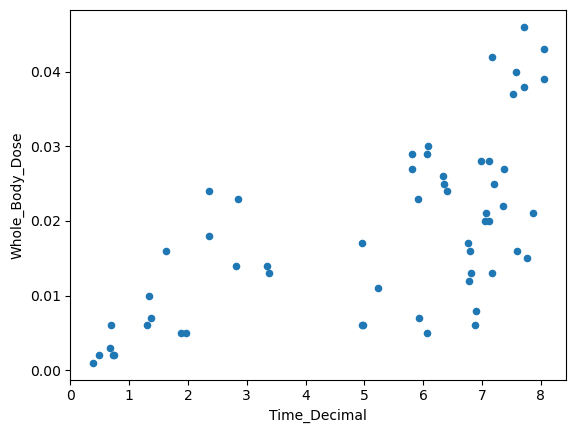

In [74]:
dayshift_3.plot(kind='scatter', x='Time_Decimal', y='Whole_Body_Dose')
plt.show() 
# Change the data frame to show all the different predictions. 
#df1
#df2
#dayshift_4
#nightshift_3
#nightshift_4

In [75]:
x_train, x_test, y_train, y_test = train_test_split(dayshift_3['Time_Decimal'], dayshift_3['Whole_Body_Dose'],train_size=0.8,random_state=0)
# This is training 80% of the data against the 20% of the testing data
# Change the data frame to show all the different predictions. 
#df1
#df2
#dayshift_4
#nightshift_3
#nightshift_4

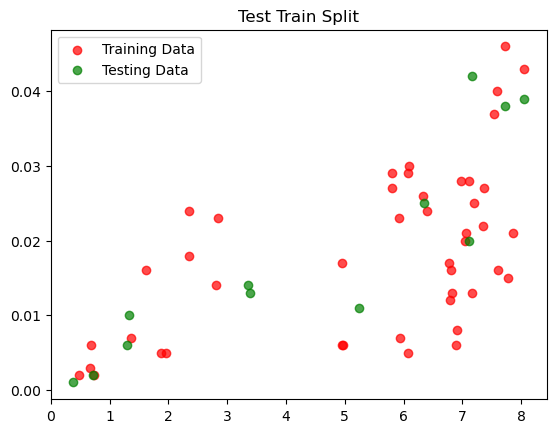

In [76]:
plt.scatter(x_train, y_train, label='Training Data', color='r', alpha=.7)
plt.scatter(x_test, y_test, label='Testing Data', color='g', alpha=.7)
plt.legend()
plt.title('Test Train Split')
plt.show()
# This is a scatter plot of the test and train data.

In [77]:
LR = LinearRegression()
LR.fit(x_train.values.reshape(-1,1), y_train.values)

LinearRegression()

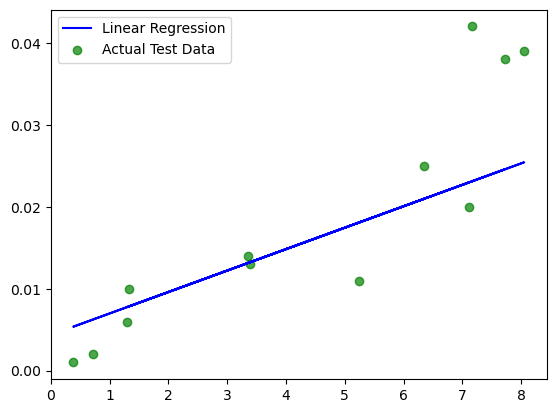

In [78]:
prediction = LR.predict(x_test.values.reshape(-1,1))

plt.plot(x_test, prediction, label='Linear Regression', color='b')
plt.scatter(x_test, y_test, label='Actual Test Data', color='g', alpha=.7)
plt.legend()
plt.show()
# This shows my linear regression line, you can see its not much data.

In [79]:
LR.predict(np.array([[8]]))[0] # Type in the hour to see the predictive dose. Changing the LR.Predict to Numpy array so i could type in the hours i wanted for a dose prediction.

0.02529747773102509

In [80]:
LR.score(x_test.values.reshape(-1,1), y_test.values) # I went through all my data and dayshift_3 scored the highest prediction score

0.635675459979417

# A simple scatter plot with a trendline

In [82]:

fig7 = px.scatter(
    dayshift_3, x='Whole_Body_Dose', y='Time_Decimal', opacity=0.65,
    trendline='ols', trendline_color_override='red'
)
fig7.show()


# Conclusion 

I am not happy with the results, yes, I did what I set out to do which was a shift analysis and a machine learning algorithm, but my goal that I want to do is,to get the guys on the shop floor to understand we are not monitoring them via the EPDs we are trying to help them take less radiation which is the ultimate goal. The less radiation the better, if we can get an accurate time and dose prediction then we can plan better. We will need to police this better just like they do on nuclear power stations where you clock in on the EPD at the job and once complete you clock out and hand in the EPD.

I feel like night shift is less productive, given the time difference between days and dose taken, yes, one of the data frames say different, but we did not start night shift straight away on this task, this I why I believe we need to manage the night shift better as I think that people are taking advantage of night shift. If we can get better dosimetry control, we will be able to predict the dose more accurately.

